In [1]:
#use this to retrieve L3 and display monthly

In [21]:
import earthaccess
import xarray as xr
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

In [14]:
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_LANDVI',
    temporal = ("2024-01-01", "2025-12-31"), #use larger memory to avoid crash
    granule_name="*.MO.*.4km.*"
)
fileset = earthaccess.open(results)
ds = xr.open_dataset(fileset[1])

QUEUEING TASKS | :   0%|          | 0/21 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/21 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/21 [00:00<?, ?it/s]

In [27]:
results

[Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_LANDVI'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-03-31T23:59:59Z', 'BeginningDateTime': '2024-03-05T00:00:00Z'}}
 Size(MB): 317.3418445587158
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240301_20240331.L3m.MO.LANDVI.V3_1.4km.nc'],
 Collection: {'ShortName': 'PACE_OCI_L3M_LANDVI', 'Version': '3.1'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'NorthBoundingCoordinate': 90, 'WestBoundingCoordinate': -180, 'EastBoundingCoordinate': 180}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-04-01T00:00:00Z', 'EndingDateTime': '2024-04-30T23:59:59Z'}}
 Size(MB): 278.57926

In [15]:
# We can open all the files but note there is no time coordinate so we need
# combine="nested" and concat_dim
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 31GB
Dimensions:  (time: 21, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 16kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

In [16]:
# Let's add the time coord since we will likely want to subset on time later
import pandas as pd
t = pd.date_range(start="2024-03-01", end="2025-11-30", freq="MS") #set to actual date, otherwise will result in an error
ds = ds.assign_coords(time=t)
ds

<xarray.Dataset> Size: 31GB
Dimensions:  (time: 21, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * time     (time) datetime64[ns] 168B 2024-03-01 2024-04-01 ... 2025-11-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 16kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

/tmp/ipykernel_116/2202413426.py:22: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in ndvi_plot.axes.flat:


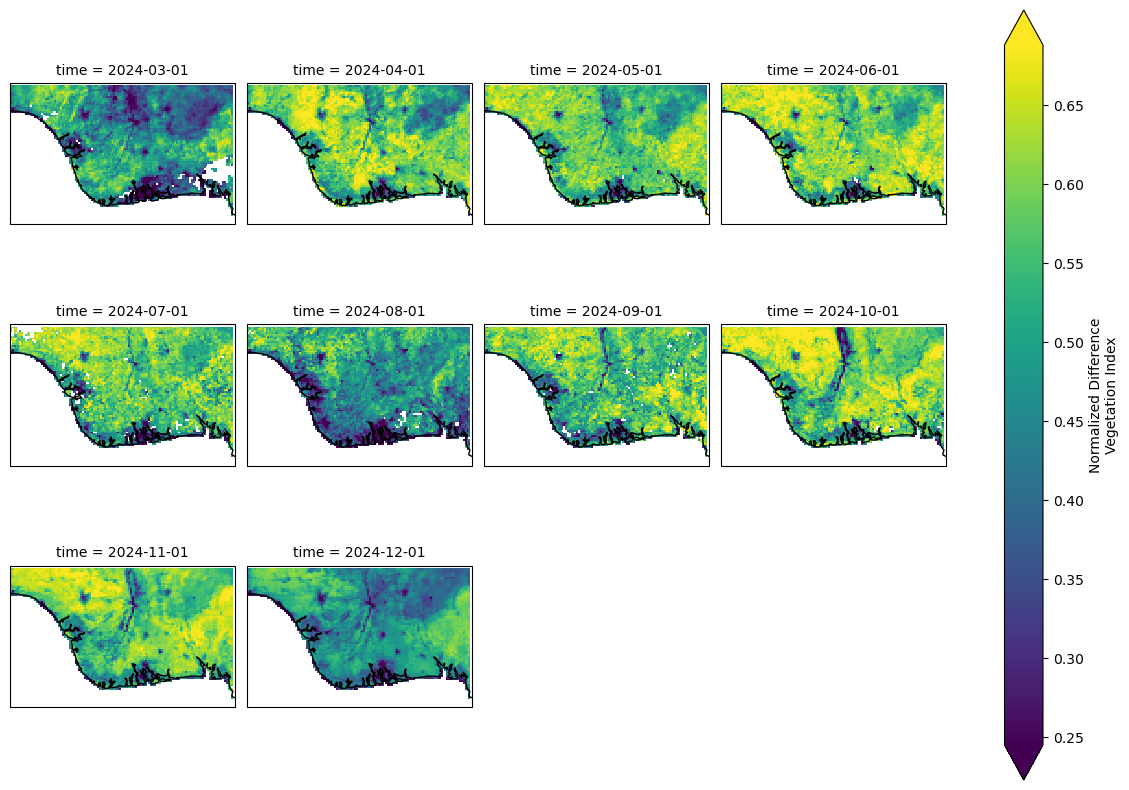

In [18]:
#caution, use larger memory to avoidcrash
import matplotlib.pyplot as plt

ndvi = ds["ndvi"].sel(
    lat=slice(7, 3), 
    lon=slice(3, 9),
    time=slice("2024-03-01", "2024-12-30") #WHEN THIS CHANGED, ALSO CHANGE THE OUTPUT NAME BELOW
)

import cartopy.crs as ccrs
ndvi_plot=ndvi.plot(
    col="time",            # one panel per month
    col_wrap=4,            # 4 columns per row
    #vmin=0.7,
    #vmax=0.8,
    robust=True,           # ignore outliers for color scale
    figsize=(12, 8),
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree()
)

for ax in ndvi_plot.axes.flat:
    ax.set_extent(
        [3.956111, 9.040000, 3.856667, 7.049167],
        crs=ccrs.PlateCarree()
    )
    ax.coastlines()

plt.savefig("2024_timeseries2.png") #DONT FORGET TO CHANGE THIS

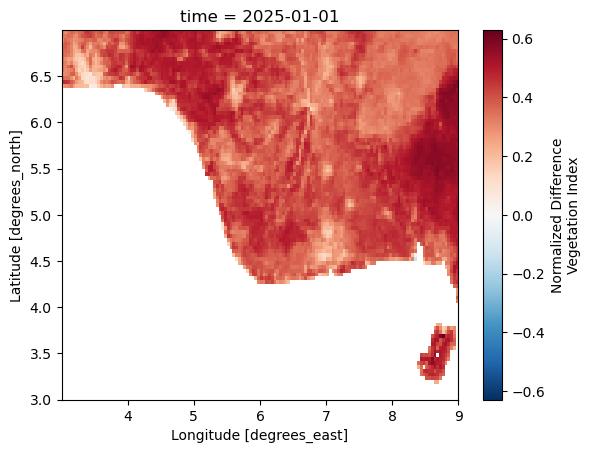

In [57]:
ndvi.isel(time=0).plot()


In [8]:
ds["ndvi"]

<xarray.DataArray 'ndvi' (time: 21, lat: 4320, lon: 8640)> Size: 3GB
dask.array<concatenate, shape=(21, 4320, 8640), dtype=float32, chunksize=(1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 168B 2024-03-01 2024-04-01 ... 2025-11-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Normalized Difference Vegetation Index
    standard_name:  normalized_difference_vegetation_index
    valid_min:      -1000.0
    valid_max:      1000.0
    display_scale:  linear
    display_min:    -0.05
    display_max:    0.9152

### Getting spectral information
1. Get random points (n=100) inside mangrove shapefile. Each with minimum radius of 2km to avoid overlap
2. Extract the spectral information on each point
3. Visualize the spectral information across 100 points
4. Calculate the mean band value and visualize it


In [9]:
import os
import geopandas as gpd

shp_path = os.path.join("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/points_mangrove2.shp")

gdf = gpd.read_file(shp_path)
gdf


,id,geometry
0,0,POINT (-10185924.496 6131629.471)
1,1,POINT (-10214793.95 5962069.4)
2,2,POINT (-10151434.736 5889677.407)
3,3,POINT (-10229469.887 6060364.312)
4,4,POINT (-10060962.21 5807838.93)
...,...,...
95,95,POINT (-10169464.487 6116006.761)
96,96,POINT (-10044450.271 5728379.671)
97,97,POINT (-10064037.632 5798072.397)
98,98,POINT (-10246866.481 6050630.839)


In [5]:
import pandas as pd

# Load ship data
track_df = pd.read_csv("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/mangrove_points.csv")
print(track_df.columns.tolist())
track_df

['id', 'x', 'y']


,id,x,y
0,0,5.474937,5.579239
1,1,6.511257,4.419668
2,2,7.287159,4.550484
3,3,5.773938,4.831105
4,4,8.252555,4.845064
...,...,...,...
95,95,5.655955,5.633314
96,96,8.863505,4.533292
97,97,8.304398,4.764856
98,98,5.763995,4.632289


In [22]:
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_SFREFL',
    temporal = ("2024-03-01", "2024-03-31"),
    granule_name="*.MO.*.4km.*"
)

fileset = earthaccess.open(results)
ds1 = xr.open_dataset(fileset[0])

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
ds1 = xr.open_dataset(fileset[0])
ds1

<xarray.Dataset> Size: 18GB
Dimensions:     (lat: 4320, lon: 8640, wavelength: 122, rgb: 3,
                 eightbitcolor: 256)
Coordinates:
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * wavelength  (wavelength) float64 976B 346.0 351.0 ... 2.131e+03 2.258e+03
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    rhos        (lat, lon, wavelength) float32 18GB ...
    palette     (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.SFRE...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/SFREFL/3.1
    data_bins:                         31469390
    data_minimum:                      -0.049858075
    data_maximum:                      1.5

In [24]:
# Spatial Subset (optional)
lat_bounds = slice(7, 3)
lon_bounds = slice(3, 9)
ds1_subset = ds1.sel(lat=lat_bounds, lon=lon_bounds)


In [25]:
track_df.dtypes
track_df.head()
#track_df.len()

NameError: name 'track_df' is not defined

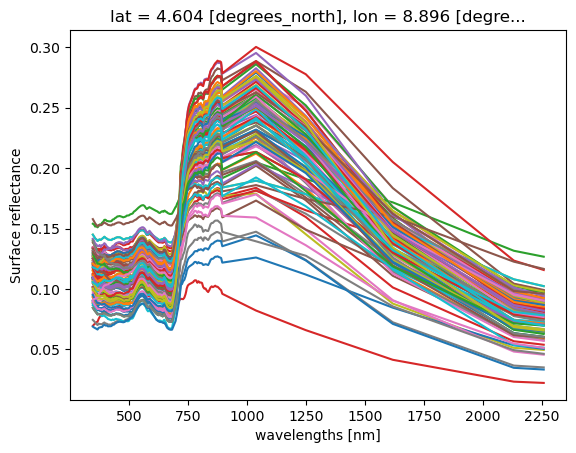

In [15]:
for i, row in track_df.iterrows():
    lat = row["y"]
    lon = row["x"]

    pt = ds1["rhos"].sel(lat=lat, lon=lon, method="nearest")
    pt.plot.line(x="wavelength", label=f"Point {i}")


In [ ]:
for i, row in track_df.iterrows():
    lat = row["x"] #this is incorrect lat lon
    lon = row["y"]

    pt = ds1["rhos"].sel(lat=lat, lon=lon, method="nearest")
    pt.plot.line(x="wavelength", label=f"Point {i}")

In [16]:
spectra = []

for i, row in track_df.iterrows():
    lat = row["x"]
    lon = row["y"]

    pt = ds1["rhos"].sel(
        lat=lat, 
        lon=lon, 
        method="nearest")

    spectra.append(pt)


In [17]:
import xarray as xr

spectra_da = xr.concat(spectra, dim="points")


In [18]:
spectra_da

<xarray.DataArray 'rhos' (points: 100, wavelength: 122)> Size: 49kB
array([[0.13940832, 0.13772403, 0.13691142, ..., 0.17257465, 0.10834996,
        0.10162495],
       [0.13200027, 0.12832686, 0.12515573, ..., 0.23644401, 0.12983139,
        0.1198639 ],
       [0.08699939, 0.08594388, 0.08583164, ..., 0.19212656, 0.09977195,
        0.0958228 ],
       ...,
       [0.10279489, 0.10250877, 0.10239989, ..., 0.32730573, 0.25327036,
        0.24049912],
       [0.04920933, 0.05087051, 0.0522574 , ..., 0.03221713, 0.0250025 ,
        0.02292809],
       [0.0992574 , 0.09934717, 0.09978589, ..., 0.32764122, 0.25890902,
        0.24581717]], shape=(100, 122), dtype=float32)
Coordinates:
  * wavelength  (wavelength) float64 976B 346.0 351.0 ... 2.131e+03 2.258e+03
    lat         (points) float32 400B 5.479 6.521 7.271 ... 8.312 5.771 8.896
    lon         (points) float32 400B 5.563 4.438 4.563 ... 4.771 4.646 4.604
Dimensions without coordinates: points
Attributes:
    long_name:      Surface reflectance
    valid_min:      -0.05
    valid_max:      1.5
    display_scale:  linear
    display_min:    0.0
    display_max:    0.0

In [19]:
mean_spec = spectra_da.mean(dim="points")


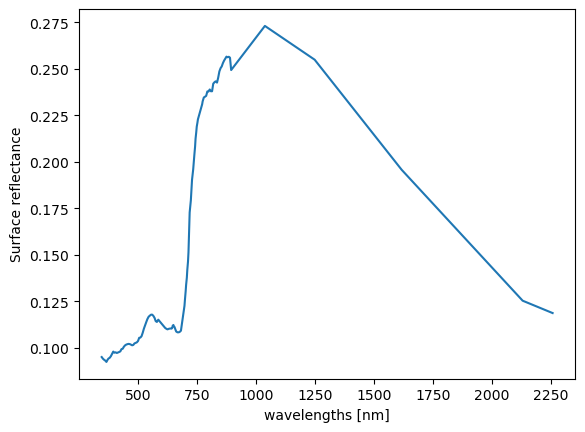

In [20]:
mean_spec.plot.line(x="wavelength")


In [ ]:
 pt.plot.line(x="wavelength", label=f"Point {i}")

In [ ]:
mean = spectra_da.mean("points")
std  = spectra_da.std("points")

mean.plot.line(x="wavelength")
(mean + std).plot.line(x="wavelength", linestyle="--")
(mean - std).plot.line(x="wavelength", linestyle="--")


In [21]:
#load mangrove boundaru
import geopandas as gpd

mangrove = gpd.read_file("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/nigermangrove_dissolved.shp")

# reproject if needed
if mangrove.crs != "EPSG:4326":
    mangrove = mangrove.to_crs("EPSG:4326")


/tmp/ipykernel_663/1515249008.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right")
/tmp/ipykernel_663/1515249008.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


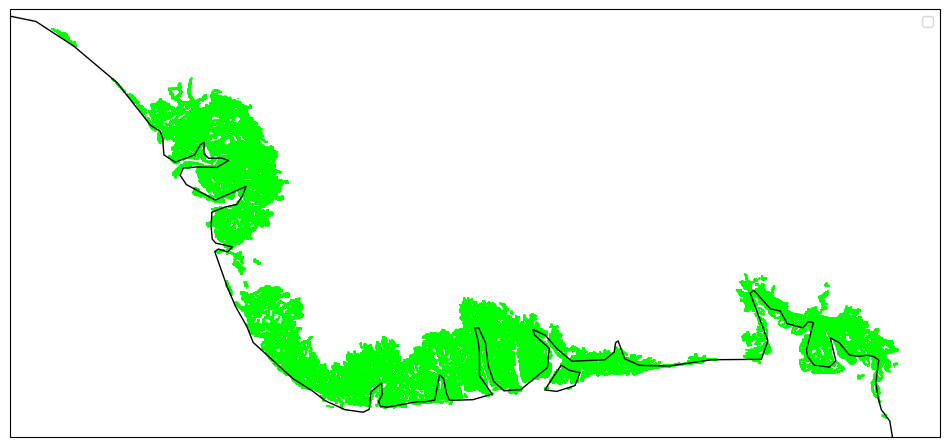

In [26]:
#see the mangrove boundary
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


# Niger delta bounds: (lat_max, lat_min, lon_min, lon_max)
ds_nigdelta = ds1.sel(
    lat=slice(7, 3), 
    lon=slice(3, 9)
)

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})

ax.coastlines(resolution="50m")

mangrove.plot(   
    ax=ax,
    facecolor="none",
    edgecolor="lime",
    linewidth=1.2,
    transform=ccrs.PlateCarree(),
    label="Mangrove"
)


ax.legend(loc="upper right")


['id', 'x', 'y']


/tmp/ipykernel_334/1104925912.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


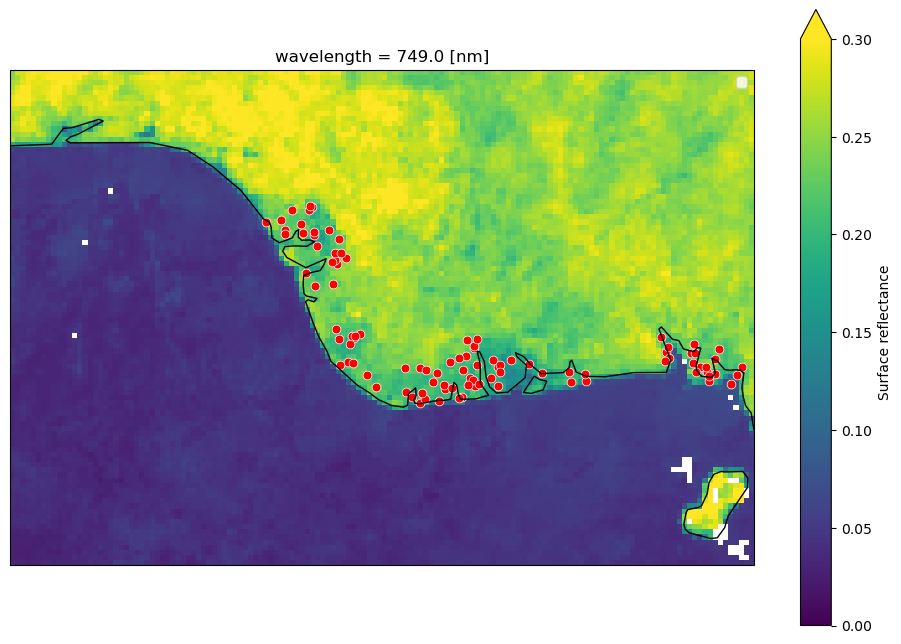

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


# Niger delta bounds: (lat_max, lat_min, lon_min, lon_max)
ds_nigdelta = ds1.sel(
    lat=slice(7, 3), 
    lon=slice(3, 9)
)

#use wavelength of 1125 based on the spectral characteristic above
Rrs_ds = ds_nigdelta["rhos"].sel(wavelength=750.0, method="nearest")

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})
Rrs_ds.plot(ax=ax, cmap="viridis", add_colorbar=True, vmin=0, vmax=0.3)
ax.coastlines(resolution="50m")

ax.legend(loc="upper right")


import pandas as pd

# Load ship data
points_df = pd.read_csv("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/mangrove_points.csv")
print(points_df.columns.tolist())
points_df
ax.scatter(points_df["x"], points_df["y"], s=40, c="red", edgecolor="white", linewidth=0.5, label="Stations")


plt.show()

In [ ]:
Further analysis:
1. Use band ratio
2. create scatter plot of the band value

## Classifying land cover

In [28]:
# Load Libraries 
import earthaccess
import numpy as np
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.integrate import trapezoid

In [26]:
# Spatial Subset (optional)
lat_bounds = slice(7, 3)
lon_bounds = slice(3, 9)
ds1_rrs=ds1["rhos"]
ds1_subset = ds1_rrs.sel(lat=lat_bounds, lon=lon_bounds)


In [29]:
# Normalize satellite data
norm = np.sqrt((ds1_subset ** 2).sum(dim='wavelength'))
ds1_norm = ds1_subset / norm

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

n_clusters = 10
use_normalized = True  # Set True for normalized spectra, False for raw spectra

# Choose which data to use and get rid of NaNs
rrs_flat = ds1_norm.stack(pix=('lat', 'lon')).transpose('pix', 'wavelength').values
rrs_flat_nonnorm = ds1_subset.stack(pix=('lat', 'lon')).transpose('pix', 'wavelength').values
X_input = rrs_flat if use_normalized else rrs_flat_nonnorm
mask = np.where(~np.isnan(X_input).any(axis=1))[0]
X_scaled = X_input[mask, :]

# Run K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
cluster_means = np.array([X_scaled[kmeans_labels == k].mean(axis=0) for k in range(n_clusters)])

In [31]:
# Reorder clusters by cluster-mean nRrs(443)/nRrs(551): descending order

wavelength = ds1_rrs['wavelength'].values

wavelengths_plot = np.array(wavelength)
i443 = np.argmin(np.abs(wavelengths_plot - 443))
i551 = np.argmin(np.abs(wavelengths_plot - 551))
ratios = cluster_means[:, i443] / cluster_means[:, i551]
order = np.argsort(-ratios)

# We have the index, now let's actually reorder the cluster means + labels for plotting
cluster_means_ordered = cluster_means[order, :]
kmeans_labels_ordered = np.zeros_like(kmeans_labels)
for new_idx, old_idx in enumerate(order):
    kmeans_labels_ordered[kmeans_labels == old_idx] = new_idx

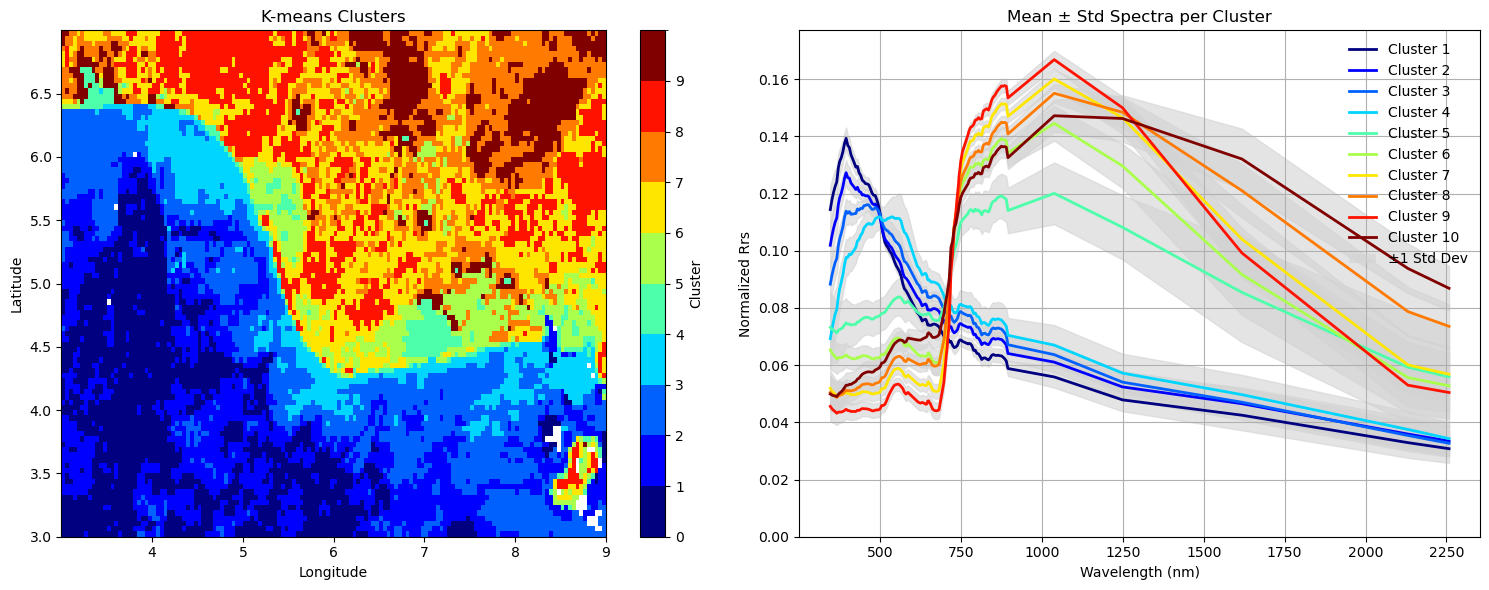

<Figure size 640x480 with 0 Axes>

In [32]:
# Create cluster map for plotting
cluster_map = np.full(X_input.shape[0], np.nan)
cluster_map[mask] = kmeans_labels_ordered  # pixels labeled 0..n_clusters-1 in your desired order
cluster_map_2d = cluster_map.reshape(ds1_subset.sizes['lat'],  ds1_subset.sizes['lon'])
cluster_da = xr.DataArray(cluster_map_2d, dims=('lat','lon'), coords={'lat':  ds1_subset['lat'], 'lon': ds1_subset['lon']}, name='kmeans_cluster')
# Colormap setup
colors = plt.cm.jet(np.linspace(0, 1, n_clusters))
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(0, n_clusters+1), ncolors=n_clusters, clip=True)

# Plotting: side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Panel 1: Cluster map
im = axes[0].pcolormesh(cluster_da.lon, cluster_da.lat, cluster_da, cmap=cmap, shading='auto', norm=norm)
axes[0].set_title('K-means Clusters')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
fig.colorbar(im, ax=axes[0], label='Cluster', ticks=np.arange(0, n_clusters))

# Panel 2: Mean ± std spectra
ax = axes[1]
for cluster_id in range(n_clusters):
    cluster_pixels = X_scaled[kmeans_labels_ordered == cluster_id, :]
    if cluster_pixels.size == 0:
        continue
    mean_spec = cluster_pixels.mean(axis=0)
    std_spec = cluster_pixels.std(axis=0)
    # Plot shaded ±1 std and mean line
    ax.fill_between(wavelengths_plot, mean_spec-std_spec, mean_spec+std_spec, color='lightgray', alpha=0.6)
    ax.plot(wavelengths_plot, mean_spec, color=colors[cluster_id], lw=2, label=f'Cluster {cluster_id+1}')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Normalized Rrs" if use_normalized else "Rrs")
ax.set_title("Mean ± Std Spectra per Cluster")
ax.grid(True)
ax.set_ylim(bottom=0)
# Legend
handles = [Line2D([0],[0], color=colors[i], lw=2, label=f'Cluster {i+1}') for i in range(n_clusters)]
handles.append(Patch(facecolor='lightgray', edgecolor='none', alpha=0.6, label='±1 Std Dev'))
ax.legend(handles=handles, fontsize=10, frameon=False)
plt.tight_layout()
plt.show()

plt.savefig("10cluster.png", dpi=150, bbox_inches="tight") 

## Create vid or gif of different wavelength

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


# Niger delta bounds: (lat_max, lat_min, lon_min, lon_max)
ds_nigdelta = ds1.sel(
    lat=slice(7, 3), 
    lon=slice(3, 9)
)

#use wavelength of 1125 based on the spectral characteristic above
Rrs_ds = ds_nigdelta["rhos"].sel(wavelength=750.0, method="nearest")

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})
Rrs_ds.plot(ax=ax, cmap="viridis", add_colorbar=True, vmin=0, vmax=0.3)
ax.coastlines(resolution="50m")

ax.legend(loc="upper right")


import pandas as pd

# Load ship data
points_df = pd.read_csv("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/mangrove_points.csv")
print(points_df.columns.tolist())
points_df
ax.scatter(points_df["x"], points_df["y"], s=40, c="red", edgecolor="white", linewidth=0.5, label="Stations")


plt.show()

In [20]:
Rrs_ds = ds_nigdelta["rhos"]


In [21]:
print(Rrs_ds.dims)
# ('time', 'wavelength', 'lat', 'lon')  or ('wavelength', 'lat', 'lon')


('lat', 'lon', 'wavelength')


In [22]:
# decide min max
vmin = float(Rrs_ds.min())
vmax = float(Rrs_ds.max())


In [23]:
#create gif
import imageio
import os
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

frames = []
tmp_dir = "frames_wavelength"
os.makedirs(tmp_dir, exist_ok=True)

for wl in Rrs_ds.wavelength.values:
    fig, ax = plt.subplots(
        figsize=(12, 8),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )

    Rrs_ds.sel(wavelength=wl).plot(
        ax=ax,
        cmap="viridis",
        vmin=vmin,
        vmax=vmax,
        add_colorbar=True
    )

    ax.coastlines(resolution="50m")

    ax.scatter(
        points_df["x"],
        points_df["y"],
        s=40,
        c="red",
        edgecolor="white",
        linewidth=0.5,
        transform=ccrs.PlateCarree(),
        label="Stations"
    )

    ax.set_title(f"Rrs | {int(wl)} nm")

    fname = f"{tmp_dir}/wl_{int(wl)}.png"
    plt.savefig(fname, dpi=150, bbox_inches="tight")
    plt.close()

    frames.append(imageio.imread(fname))


/tmp/ipykernel_334/8883564.py:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))
/tmp/ipykernel_334/8883564.py:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))
/tmp/ipykernel_334/8883564.py:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))
/tmp/ipykernel_334/8883564.py:45: 

In [24]:
imageio.mimsave(
    "rrs_spectral_scan.gif",
    frames,
    duration=0.4
)


## Create RGB Visualization 

In [26]:
#Preparation
Rrs = ds_nigdelta["rhos"]

# optional but recommended
#Rrs = Rrs.mean("time")

# sort wavelengths
Rrs = Rrs.sortby("wavelength")


In [27]:
#define wavelength range
wls = Rrs.wavelength.values

# valid starting wavelengths
wl_start = wls[wls + 100 <= wls.max()]


In [28]:
#color config
vmin, vmax = 0.0, 0.3


In [30]:
#normalization
import numpy as np

def norm(x, vmin, vmax):
    x = np.clip(x, vmin, vmax)
    return (x - vmin) / (vmax - vmin)


In [31]:
import imageio
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

frames = []
tmp_dir = "frames_rgb"
os.makedirs(tmp_dir, exist_ok=True)

for wl in wl_start:
    r = Rrs.sel(wavelength=wl, method="nearest")
    g = Rrs.sel(wavelength=wl + 50, method="nearest")
    b = Rrs.sel(wavelength=wl + 100, method="nearest")

    rgb = np.dstack([
        norm(r.values, vmin, vmax),
        norm(g.values, vmin, vmax),
        norm(b.values, vmin, vmax)
    ])

    fig, ax = plt.subplots(
        figsize=(12, 8),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )

    ax.imshow(
        rgb,
        extent=[
            Rrs.lon.min(), Rrs.lon.max(),
            Rrs.lat.min(), Rrs.lat.max()
        ],
        origin="upper",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="50m")

    ax.scatter(
        points_df["x"],
        points_df["y"],
        s=40,
        c="white",
        edgecolor="black",
        linewidth=0.5,
        transform=ccrs.PlateCarree()
    )

    ax.set_title(
        f"RGB composite | R={int(wl)} G={int(wl+50)} B={int(wl+100)} nm"
    )

    fname = f"{tmp_dir}/rgb_{int(wl)}.png"
    plt.savefig(fname, dpi=150, bbox_inches="tight")
    plt.close()

    frames.append(imageio.imread(fname))


/tmp/ipykernel_334/858724328.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))
/tmp/ipykernel_334/858724328.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))
/tmp/ipykernel_334/858724328.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))
/tmp/ipykernel_334/858724328

In [32]:
imageio.mimsave(
    "pace_rgb_spectral_sweep.gif",
    frames,
    duration=0.5
)
